## ESA CCI Toolbox Vector Data Cube Access

The ESA CCI Toolbox also provides access to data that is provided in the form of vector data cubes. These can be thought of as a hybrid between data cubes and vector data. It is a data cube where the spatial locations are not identified through a structured grid, but distinct geometries.

To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

For this notebook, we start as before, by opening the standard `esa-cci` data store.

In [1]:
from xcube.core.store import new_data_store

cci_store = new_data_store('esa-cci')

The data in question are ICESHEETS and SEALEVEL datasets. We can find the vector data cubes by specifying their data type.

In [2]:
descriptors = cci_store.search_data(
    data_type="vectordatacube",
)
[descriptor.data_id for descriptor in descriptors]

['esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-2.greenland_gmb_mass_trends',
 'esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-3.greenland_gmb_mass_trends',
 'esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-4.greenland_gmb_mass_trends',
 'esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-5.greenland_gmb_mass_trends',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.ASA',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.BENGUELA',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.CARIBBEAN',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.GULFSTREAM',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.HUMBOLDT',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.MED_SEA',
 'esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.NE_ATL',
 'esacci.SE

We have a closer look at the first sea level dataset.

In [3]:
descriptors[4]

Now, we can open the dataset to see what the vector data cube looks like.

In [4]:
sl_ds = cci_store.open_data(
    "esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.ASA"
)

sl_ds

<xarray.Dataset> Size: 2MB
Dimensions:                (nbpoints: 2066, nbmonth: 216, bnds: 2)
Coordinates:
  * geometry               (nbpoints) object 17kB POINT (-67.60308074951172 -...
  * nbmonth                (nbmonth) datetime64[ns] 2kB 2002-01-16T12:00:00 ....
    nbmonth_bnds           (nbmonth, bnds) datetime64[ns] 3kB dask.array<chunksize=(216, 2), meta=np.ndarray>
Dimensions without coordinates: nbpoints, bnds
Data variables:
    distance_to_coast      (nbpoints) float32 8kB dask.array<chunksize=(50,), meta=np.ndarray>
    lat                    float64 8B ...
    local_sla_trend        (nbpoints) float32 8kB dask.array<chunksize=(50,), meta=np.ndarray>
    local_sla_trend_error  (nbpoints) float32 8kB dask.array<chunksize=(50,), meta=np.ndarray>
    lon                    float64 8B ...
    sla                    (nbpoints, nbmonth) float32 2MB dask.array<chunksize=(50, 216), meta=np.ndarray>
Indexes:
    geometry  GeometryIndex (crs=None)
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi...
    date_created:            2025-12-04T11:41:39.087709
    processing_level:        IND
    time_coverage_start:     2002-01-01T00:00:00
    time_coverage_end:       2020-01-01T00:00:00
    time_coverage_duration:  P6574DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We see that the resulting dataset has a geometry coordinate which consists of single points. We may plot a variable which only has a single geometric dimension like this:

<Axes: >

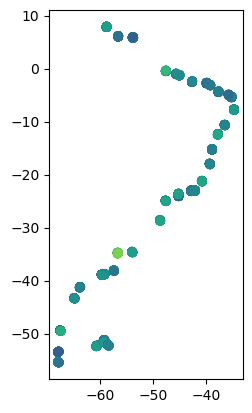

In [5]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(sl_ds[["geometry", "local_sla_trend"]].to_dataframe())
gdf.plot(column="local_sla_trend")

We may also plot variables which have values along the temporal dimension. We can do so like this:

<Axes: >

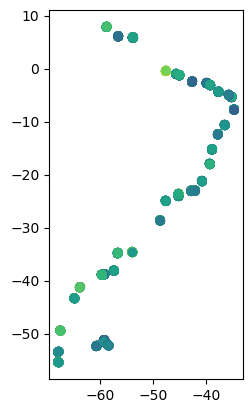

In [6]:
gdf2 = gpd.GeoDataFrame(sl_ds[["geometry", "sla", "nbmonth"]].to_dataframe())
gdf2.xs("2019-09-16 00:00:00", level="nbmonth").plot(column="sla")

<Axes: >

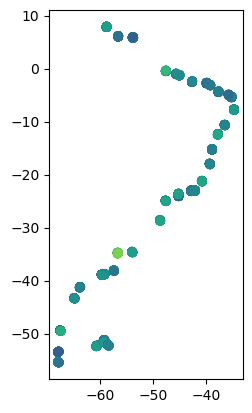

In [7]:
sl_ds = cci_store.open_data(
    "esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-2.ASA"
)
gdf = gpd.GeoDataFrame(sl_ds[["geometry", "local_sla_trend"]].to_dataframe())
gdf.plot(column="local_sla_trend")